In [1]:
#If th openai api key is not set already, please set it here.
import os
if 'OPENAI_API_KEY' not in os.environ:  
     os.environ['OPENAI_API_KEY'] = 'your key'


In [2]:
import matplotlib
%matplotlib widget
from amadeusgpt.main import AMADEUS
from amadeusgpt.config import Config
import amadeusgpt
from pathlib import Path
import matplotlib.pyplot as plt
import cv2

### Set the scene number to visualize your video in a specific frame
### Make sure your animal(s) are visible on that frame so gpt-4o can configure AmadeusGPT correctly

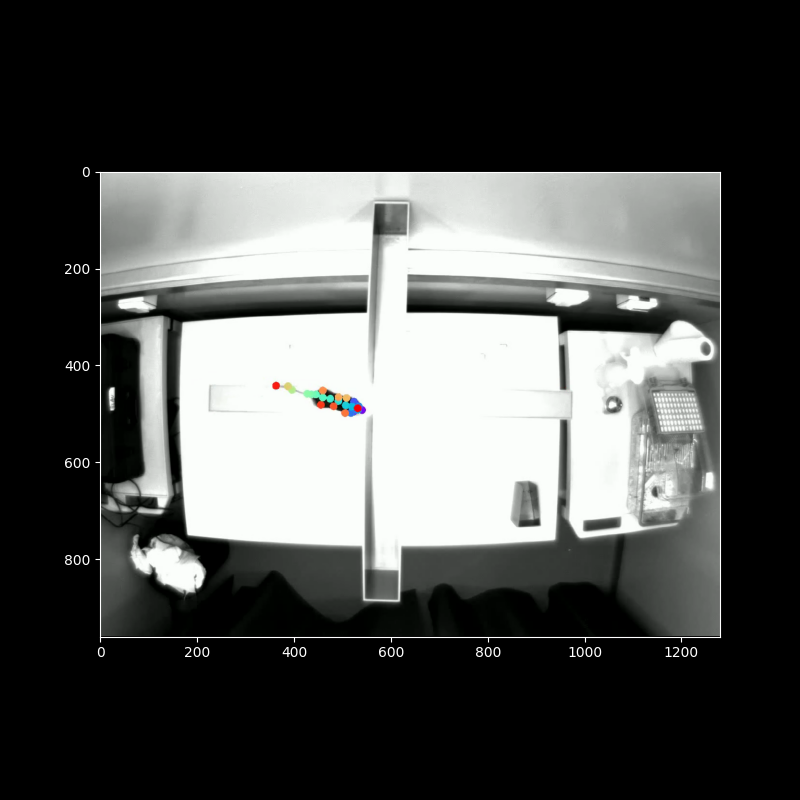

In [3]:
scene_frame_number = 400
amadeus_root = Path(amadeusgpt.__file__).parent.parent
config = Config(amadeus_root / "amadeusgpt/configs/EPM_template.yaml")
config['video_info']['scene_frame_number'] = scene_frame_number
config['video_info']['video_file_path'] = str (amadeus_root / config['video_info']['video_file_path'])
config['keypoint_info']['keypoint_file_path'] = str(amadeus_root / config['keypoint_info']['keypoint_file_path'])

cap = cv2.VideoCapture(config['video_info']['video_file_path'])

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Could not open video.")
else:
    # Set the frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES, scene_frame_number)
    # Read the frame
    ret, image = cap.read()

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
cap.release()
plt.imshow(image)
    

In [4]:
amadeus = AMADEUS(config)
behavior_analysis = amadeus.get_analysis()

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.01 $
current total tokens 1077
The image appears to be a top-down view of a laboratory setting. There is a small animal, likely a mouse, in the center of the image with colored markers on its body, indicating it is being tracked for movement or behavior analysis. The background includes various laboratory equipment and objects.

Here is the filled json string based on the image:

```json
{
    "description": "Top-down view of a laboratory setting with a small animal, likely a mouse, in the center with colored markers on its body. Various laboratory equipment and objects are visible in the background.",
    "individuals": 1,
    "species": "topview_mouse",
    "background_objects": ["laboratory equipment", "containers", "wires"]
}
```


### Draw ROIs. Press Esc when you are done drawing each ROI.
### After done just run the next cell.

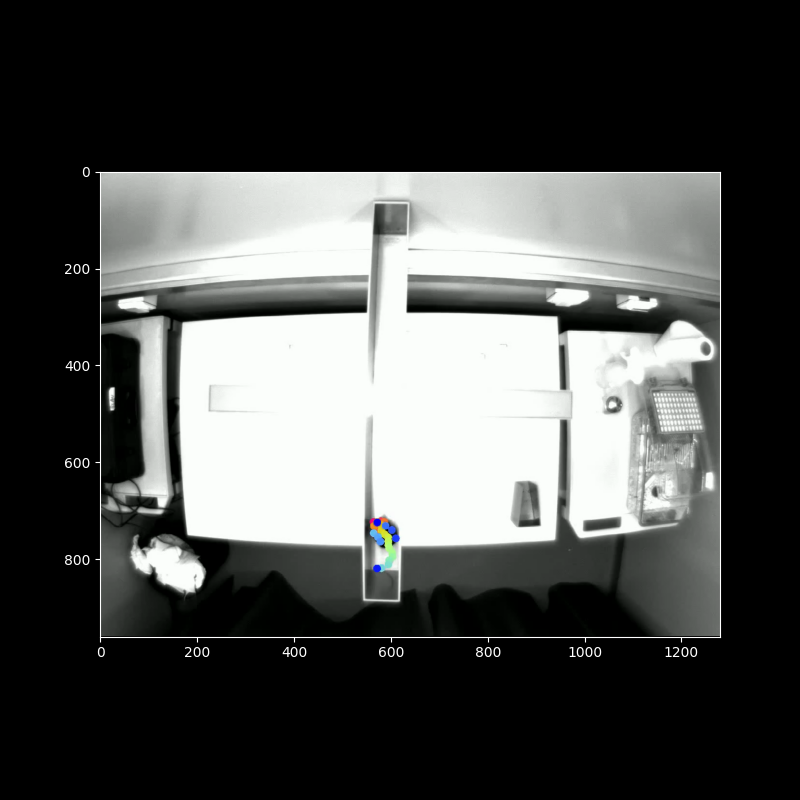

In [5]:
behavior_analysis.gui_manager.add_roi_from_video_selection()

In [6]:
from IPython.display import Markdown, display
from IPython.display import Video
def parse_result(amadeus, qa_message):
    display(Markdown(qa_message['chain_of_thought']))
    sandbox = amadeus.sandbox
    qa_message = sandbox.code_execution(qa_message)
    sandbox.render_qa_message(qa_message)
    print ('after executing the function')
    display(qa_message['meta_info'])
    print (f'videos generated to {qa_message["out_videos"]}')
    print ('Open it with media player if it does not properly display in the notebook')
    if qa_message['out_videos'] is not None:
        for video_path in qa_message['out_videos']:

            display(Video(video_path, embed=True))

    display(Markdown(str(qa_message['function_rets'])))

### Get video clips, ethogram and trajectory plots for mouse in the ROI0

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.03 $
current total tokens 3888


To determine when the mouse is in ROI0, we can use the `get_animals_object_events` function from the `AnimalBehaviorAnalysis` class. This function allows us to query events involving interactions between animals and objects, such as regions of interest (ROIs).

Here's a step-by-step explanation of how we can achieve this:

1. **Identify the Object of Interest**: In this case, the object of interest is `ROI0`.
2. **Define the Query**: We need to specify a query that checks if the mouse is inside `ROI0`. The query can be something like `'overlap == True'`.
3. **Specify Body Parts**: We can specify the body parts of the mouse that we are interested in. If we want to consider all keypoints, we can leave this as `None`.
4. **Set Window Parameters**: We need to set the minimum and maximum window lengths for the events. These parameters define the duration of the events we are interested in.

Given this information, we can write a function `get_mouse_in_ROI0_events` that uses the `get_animals_object_events` function to retrieve the events when the mouse is in `ROI0`.

Here is the code:

```python
def get_mouse_in_ROI0_events(config: Config):
    '''
    Parameters:
    ----------
    config: Config
        Configuration object containing necessary parameters for analysis.
    
    Returns:
    -------
    List[BaseEvent]
        List of events where the mouse is in ROI0.
    '''
    # Create an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(config)
    
    # Retrieve events where the mouse is in ROI0
    mouse_in_ROI0_events = analysis.get_animals_object_events(
        object_name='ROI0',
        query='overlap == True',
        negate=False,
        bodypart_names=None,  # Consider all keypoints
        min_window=1,  # Minimum length of the event
        max_window=100000  # Maximum length of the event
    )
    
    return mouse_in_ROI0_events
```

This function will return a list of events where the mouse is in `ROI0`. The `min_window` and `max_window` parameters can be adjusted based on the specific requirements of the analysis.

out videosout videosout videosout videosout videosout videosout videosout videosout videosout videos
['results/EPM_11DLC_snapshot-1000_labeled_x264_get_mouse_in_ROI0_events_video_0.mp4', 'results/EPM_11DLC_snapshot-1000_labeled_x264_get_mouse_in_ROI0_events_video_1.mp4', 'results/EPM_11DLC_snapshot-1000_labeled_x264_get_mouse_in_ROI0_events_video_2.mp4', 'results/EPM_11DLC_snapshot-1000_labeled_x264_get_mouse_in_ROI0_events_video_3.mp4', 'results/EPM_11DLC_snapshot-1000_labeled_x264_get_mouse_in_ROI0_events_video_4.mp4', 'results/EPM_11DLC_snapshot-1000_labeled_x264_get_mouse_in_ROI0_events_video_5.mp4', 'results/EPM_11DLC_snapshot-1000_labeled_x264_get_mouse_in_ROI0_events_video_6.mp4', 'results/EPM_11DLC_snapshot-1000_labeled_x264_get_mouse_in_ROI0_events_video_7.mp4']
after executing the function


{'description': 'Top-down view of a laboratory setting with a small animal, likely a mouse, in the center with colored markers on its body. Various laboratory equipment and objects are visible in the background.',
 'individuals': 1,
 'species': 'topview_mouse',
 'background_objects': ['laboratory equipment', 'containers', 'wires']}

videos generated to ['results/EPM_11DLC_snapshot-1000_labeled_x264_get_mouse_in_ROI0_events_video_0.mp4', 'results/EPM_11DLC_snapshot-1000_labeled_x264_get_mouse_in_ROI0_events_video_1.mp4', 'results/EPM_11DLC_snapshot-1000_labeled_x264_get_mouse_in_ROI0_events_video_2.mp4', 'results/EPM_11DLC_snapshot-1000_labeled_x264_get_mouse_in_ROI0_events_video_3.mp4', 'results/EPM_11DLC_snapshot-1000_labeled_x264_get_mouse_in_ROI0_events_video_4.mp4', 'results/EPM_11DLC_snapshot-1000_labeled_x264_get_mouse_in_ROI0_events_video_5.mp4', 'results/EPM_11DLC_snapshot-1000_labeled_x264_get_mouse_in_ROI0_events_video_6.mp4', 'results/EPM_11DLC_snapshot-1000_labeled_x264_get_mouse_in_ROI0_events_video_7.mp4']
Open it with media player if it does not properly display in the notebook


[<amadeusgpt.analysis_objects.event.Event object at 0x2a10addb0>, <amadeusgpt.analysis_objects.event.Event object at 0x2a10ac400>, <amadeusgpt.analysis_objects.event.Event object at 0x2a0f2f310>, <amadeusgpt.analysis_objects.event.Event object at 0x2a0f2fa30>, <amadeusgpt.analysis_objects.event.Event object at 0x2a0f2dc00>, <amadeusgpt.analysis_objects.event.Event object at 0x2a0f2fac0>, <amadeusgpt.analysis_objects.event.Event object at 0x2a0f2f490>, <amadeusgpt.analysis_objects.event.Event object at 0x2a0f2fbe0>]

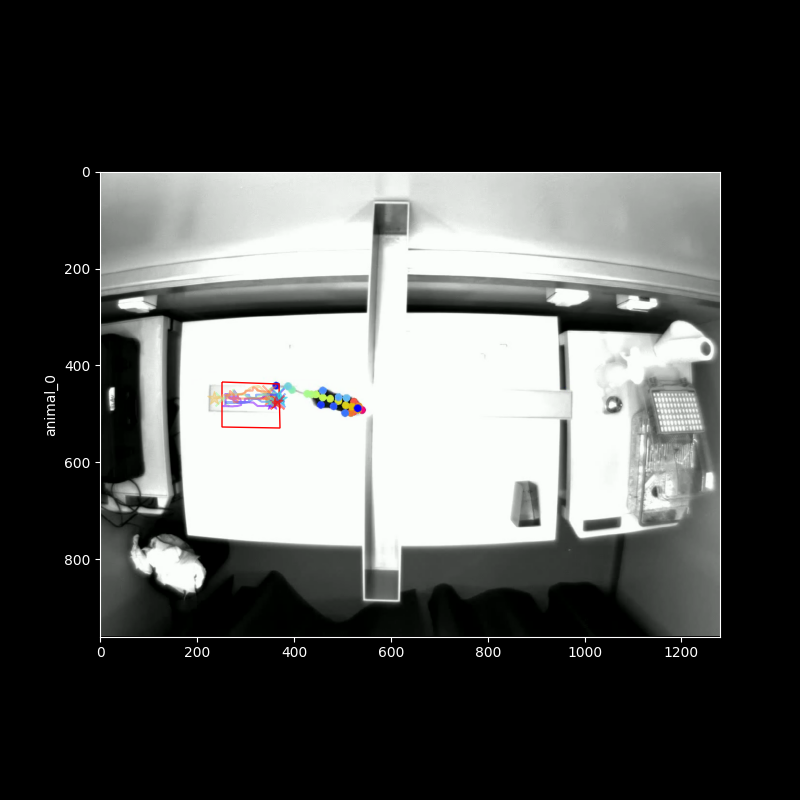

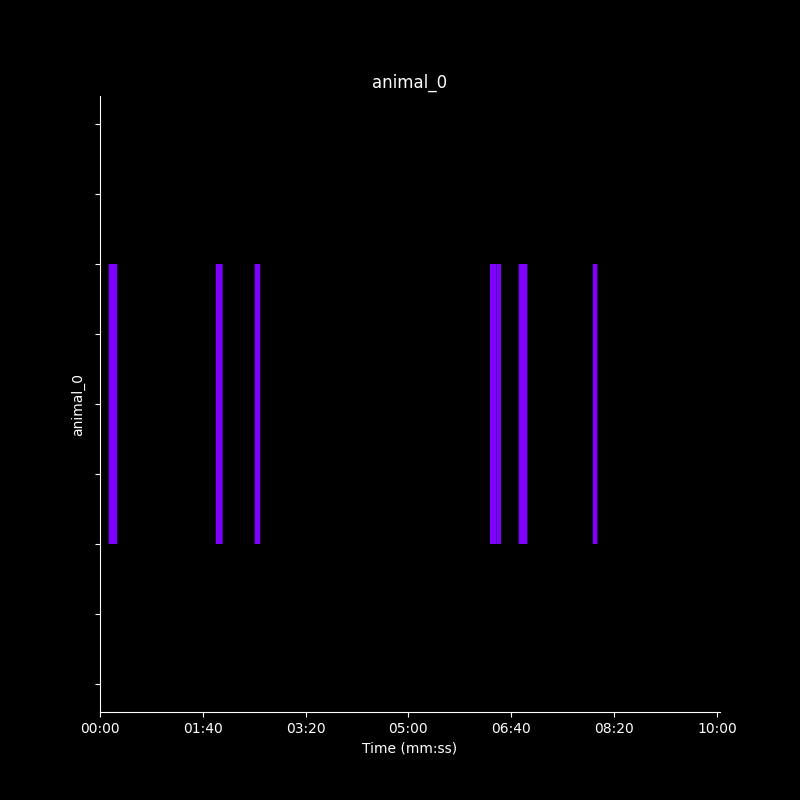

In [7]:
query = "When is the mouse in ROI0"
qa_message = amadeus.step(query)
parse_result(amadeus, qa_message)

### You can get a list of binary masks (equivalent to ethogram) for the underlying behavior, if your query is about retriving a described behavior

In [10]:
# the return masks is of shape (num_of_events, video_length)
# where each boolean array of (video_length,) is binary where True indicates whether the behavior is happening at that frame
masks = qa_message.get_masks()
print (masks.shape)

(8, 15076)


In [ ]:
query = "Plot the trajectory of the animal using the animal center and color it by time"
qa_message = amadeus.step(query)
parse_result(amadeus, qa_message)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.03 $
current total tokens 4004


To plot the trajectory of the animal using the animal center and color it by time, we need to follow these steps:

1. Retrieve the keypoints data, which includes the coordinates of the animal's body parts.
2. Extract the center keypoint data for the animal.
3. Plot the trajectory of the center keypoint over time.
4. Color the trajectory by time.

Given the core API functions, we can achieve this by using the `get_keypoints` function to get the keypoints data. We will then extract the center keypoint and plot its trajectory, coloring it by time.

Here is the function to achieve this:

```python
def plot_animal_trajectory(config: Config):
    """
    Plot the trajectory of the animal using the animal center and color it by time.

    Parameters:
    ----------
    config: Config
    """
    # Create an instance of AnimalBehaviorAnalysis
    analysis = create_analysis(config)
    
    # Get the keypoints data
    keypoints = analysis.get_keypoints()  # shape: (n_frames, n_individuals, n_kpts, n_dims)
    
    # Assuming the center keypoint is the first keypoint (index 0)
    center_keypoint = keypoints[:, :, 0, :]  # shape: (n_frames, n_individuals, n_dims)
    
    # Extract the x and y coordinates of the center keypoint for the first animal (index 0)
    x_coords = center_keypoint[:, 0, 0]  # shape: (n_frames,)
    y_coords = center_keypoint[:, 0, 1]  # shape: (n_frames,)
    
    # Create a time array
    time = np.arange(len(x_coords))
    
    # Plot the trajectory
    fig, ax = plt.subplots()
    scatter = ax.scatter(x_coords, y_coords, c=time, cmap='viridis')
    ax.invert_yaxis()  # Invert y axis to match image coordinates
    ax.set_xlim(0, 1280)
    ax.set_ylim(960, 0)
    ax.set_title('Animal Trajectory Colored by Time')
    ax.set_xlabel('X Coordinate')
    ax.set_ylabel('Y Coordinate')
    fig.colorbar(scatter, ax=ax, label='Time')
    
    return fig, ax
```

This function will plot the trajectory of the animal's center keypoint and color it by time. The x and y coordinates are extracted from the keypoints data, and the trajectory is plotted using a scatter plot with a color map representing time. The y-axis is inverted to match the image coordinates, and the plot limits are set to cover the entire image.

Loading DLC 3.0.0rc1...
DLC loaded in light mode; you cannot use any GUI (labeling, relabeling and standalone GUI)
going to inference video with superanimal_topviewmouse_hrnetw32
running video inference on ['/mnt/md0/shaokai/AmadeusGPT-dev/examples/EPM/EPM_13_short.mp4'] with superanimal_topviewmouse_hrnetw32
Using pytorch for model hrnetw32
using /mnt/md0/shaokai/AmadeusGPT-dev/examples/EPM/EPM_13_short.mp4 for video adaptation training
Task: None
scorer: None
date: None
multianimalproject: None
identity: None
project_path: /mnt/md0/shaokai/miniconda3/envs/amadeusgpt-gpu/lib/python3.10/site-packages/deeplabcut/modelzoo/project_configs
engine: pytorch
video_sets: None
bodyparts: ['nose', 'left_ear', 'right_ear', 'left_ear_tip', 'right_ear_tip', 'left_eye', 'right_eye', 'neck', 'mid_back', 'mouse_center', 'mid_backend', 'mid_backend2', 'mid_backend3', 'tail_base', 'tail1', 'tail2', 'tail3', 'tail4', 'tail5', 'left_shoulder', 'left_midside', 'left_hip', 'right_shoulder', 'right_midside',

 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▏       | 1418/1500 [02:30<00:08,  9.82it/s]

### How to retrieve results using the query

In [10]:
results = amadeus.get_results()

for key, qa_message in results.items():
    print (key)
    print (qa_message.get_masks().shape)

When is the mouse in ROI0
(8, 15076)


### Save the results to the result folder

In [8]:
amadeus.save_results()

### Load results 

In [9]:
amadeus.load_results()